<a href="https://colab.research.google.com/github/syedanida/Neural-Network/blob/main/3_3LayerNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch (with built-in modules) - 3-layer neural network.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [3]:
# Convert numpy arrays to torch tensors
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y)

In [4]:
# 3-layer neural network using PyTorch's built-in modules
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.layer1 = torch.nn.Linear(1, 5)  # Input layer to first hidden layer
        self.layer2 = torch.nn.Linear(5, 5)  # First hidden layer to second hidden layer
        self.layer3 = torch.nn.Linear(5, 1)  # Second hidden layer to output layer

    def forward(self, x):
        # Forward pass using ReLU activation function
        x = torch.relu(self.layer1(x))  # Apply ReLU activation after first layer
        x = torch.relu(self.layer2(x))  # Apply ReLU activation after second layer
        x = self.layer3(x)  # Output layer (no activation)
        return x

# Instantiate the model
model = SimpleNN()

In [5]:
# Loss function (Mean Squared Error)
criterion = torch.nn.MSELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    # Zero the gradients from the previous step
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())  # Append loss value to track it

    # Backward pass and optimize
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters using gradients

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.32091885805130005
Epoch 100, Loss: 0.08811679482460022
Epoch 200, Loss: 0.08355699479579926
Epoch 300, Loss: 0.07984606921672821
Epoch 400, Loss: 0.07573695480823517
Epoch 500, Loss: 0.07083851099014282
Epoch 600, Loss: 0.06487936526536942
Epoch 700, Loss: 0.057771798223257065
Epoch 800, Loss: 0.04964018985629082
Epoch 900, Loss: 0.04100891202688217


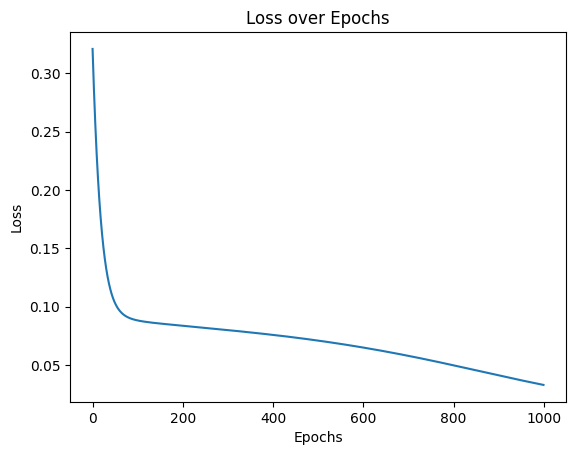

In [7]:
# Plotting the loss curve
plt.plot(losses)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

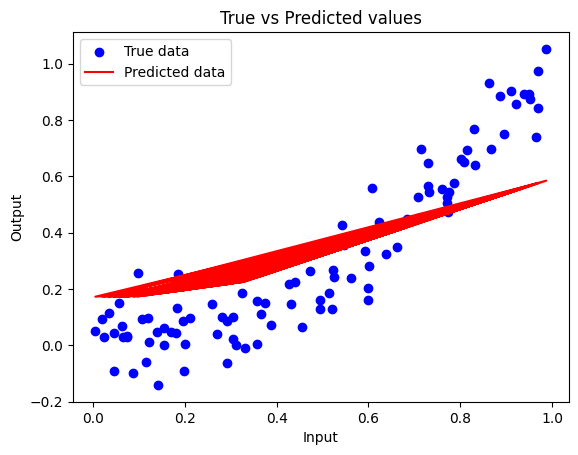

In [8]:
# Plotting the predictions vs true values
y_pred = model(X_train).detach().numpy()  # Get predictions from model
plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='red', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()